# Probability
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/dmhuehol/ev228-analysis-environmental-data/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/dmhuehol/ev228-analysis-environmental-data/blob/main/code/what_is_pdf.ipynb)  
*This code is made available under an MIT License, included as the LICENSE file in this repository.*

This example explores fundamental probability concepts.

In [87]:
import random

import matplotlib.pyplot as plt
import numpy as np

##  Rolling a die
The probability of obtaining any single value from rolling a fair die is one in six.

In [1]:
prob_die = 1 / 6
print(prob_die)

0.16666666666666666


But what if we want to verify this ourselves? The following code functions as throwing a virtual die.

In [ ]:
roll_value = random.randint(1, 6)
print(roll_value)

3


In [14]:
def dice_roll(max_val=6, append_list=None):
    roll_value = random.randint(1, max_val)
    if append_list is not None:
        append_list.append(roll_value)
    return roll_value, append_list

In [ ]:
list_rolls = list()

To do some analysis, we want to make a way to throw the virtual die many times and keep track of our results. In pseudocode, we want to:  
1. Roll our virtual die.  
2. Append each roll of the virtual die to a variable.  
3. Count the number of times we've rolled the die.  
3. Display the result of the newest roll.  
4. Display the list of all rolls.  
5. Display the number of rolls.  

In [120]:
newest_roll, track_rolls = dice_roll(max_val=6, append_list=list_rolls)
str_newest_roll = 'Newest roll: ' + str(newest_roll)
str_all_rolls = 'All rolls: ' + str(track_rolls)
num_rolls = len(track_rolls)
str_num_rolls = 'Number of rolls: ' + str(num_rolls)
print(str_newest_roll)
print(str_all_rolls)
print(str_num_rolls)

Newest roll: 5
All rolls: [1, 2, 2, 4, 6, 5, 2, 3, 4, 5, 5, 6, 5, 5, 3, 4, 3, 4, 4, 5]
Number of rolls: 20


We can visualize the results by showing the count of each time a given value occurs. One way to do this is with a histogram (bar chart); another way would be to make a pie chart.

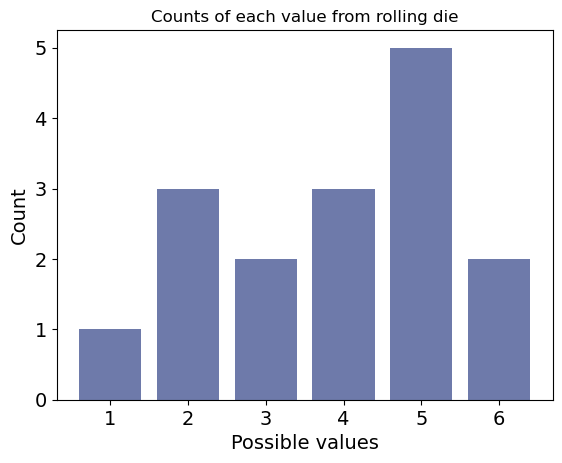

In [116]:
x_bins = np.arange(1, 7)
val_counts, bin_edges = np.histogram(track_rolls, bins=6, range=(1,6))

fig, ax = plt.subplots()
ax.bar(x_bins, val_counts, color='#6e7aaa')
plt.xlabel('Possible values', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yticks(fontsize=14)
plt.title('Counts of each value from rolling die')
plt.show()

We can also display the frequency in percent of each value.

In [123]:
val_percents = val_counts / num_rolls * 100

str_freq = 'Frequency of '
print(str_freq + '1: ' + str(val_percents[0]) + '%')

Frequency of 1: 5.0%


Theoretically, the probability of obtaining any single value should be about 16.7% for each. Unless you were extraordinarily lucky, your values are probably nowhere close to this. This doesn't mean you broke probability--we just need a lot more samples!

## Automation: Rolling a BUNCH of dice
The code we've written works well for what we've been doing, but requires manual intervention for each roll of the die. That's not too annoying if we're rolling the dice a handful of times, but quickly becomes impractical if we want to roll the die many times. For example, let's try rolling the die 10000 times.

In [131]:
loop_list = list()
number_of_trials = 10000
for loop_count in np.arange(0, number_of_trials):
    str_loop_roll = 'Roll on loop ' + str(loop_count) + ': ' + str(newest_roll)
    print(str_loop_roll)
    newest_roll, track_loop_rolls = dice_roll(max_val=6, append_list=loop_list)

Roll on loop 0: 1
Roll on loop 1: 4
Roll on loop 2: 2
Roll on loop 3: 6
Roll on loop 4: 3
Roll on loop 5: 2
Roll on loop 6: 5
Roll on loop 7: 5
Roll on loop 8: 5
Roll on loop 9: 1
Roll on loop 10: 6
Roll on loop 11: 4
Roll on loop 12: 3
Roll on loop 13: 1
Roll on loop 14: 6
Roll on loop 15: 1
Roll on loop 16: 4
Roll on loop 17: 3
Roll on loop 18: 5
Roll on loop 19: 4
Roll on loop 20: 1
Roll on loop 21: 1
Roll on loop 22: 5
Roll on loop 23: 5
Roll on loop 24: 1
Roll on loop 25: 2
Roll on loop 26: 4
Roll on loop 27: 3
Roll on loop 28: 2
Roll on loop 29: 4
Roll on loop 30: 2
Roll on loop 31: 1
Roll on loop 32: 5
Roll on loop 33: 4
Roll on loop 34: 1
Roll on loop 35: 5
Roll on loop 36: 3
Roll on loop 37: 1
Roll on loop 38: 3
Roll on loop 39: 6
Roll on loop 40: 2
Roll on loop 41: 4
Roll on loop 42: 6
Roll on loop 43: 2
Roll on loop 44: 1
Roll on loop 45: 1
Roll on loop 46: 6
Roll on loop 47: 4
Roll on loop 48: 6
Roll on loop 49: 2
Roll on loop 50: 4
Roll on loop 51: 6
Roll on loop 52: 4
Rol

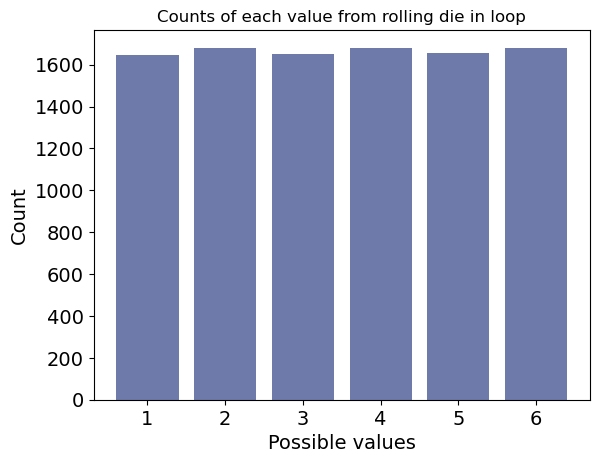

In [ ]:
val_counts, bin_edges = np.histogram(track_loop_rolls, bins=6, range=(1, 6))

fig, ax = plt.subplots()
ax.bar(x_bins, val_counts, color='#6e7aaa')
plt.xlabel('Possible values', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yticks(fontsize=14)
plt.title('Counts of each value from rolling die in loop')
plt.show()

Frequency of 1: 8240.0%


This is much closer to the expected value of 16.6%! As the number of trials increases, the output approaches the expected value.

## How many trials do we need?

How many trials are necessary to approach the expected value? We can make a function that allows us to obtain the frequency for a given value based on the number of trials.

In [145]:
def dice_value_trials(trials=1000, val_oi=None):
    ''' Return dice values from throwing a die for input number of trials 
    Keyword Arguments
        trials: number of epochs to roll die
        val_oi: value of interest for which to return frequency
    
    Returns
        dict_freq: a dictionary with frequency for each value
        out_val_freq: frequency for the specific value of interest
    '''
    val_list = list()
    for loop_count in np.arange(0, trials):
        newest_roll, val_list = dice_roll(
            max_val=6, append_list=val_list)
    val_counts, _ = np.histogram(val_list, bins=6, range=(1, 6))
    dict_freq = {
        1: val_counts[0] / trials,
        2: val_counts[1] / trials,
        3: val_counts[2] / trials,
        4: val_counts[3] / trials,
        5: val_counts[4] / trials,
        6: val_counts[5] / trials
    }
    if val_oi is not None:
        out_val_freq = dict_freq[val_oi]
    else:
        out_val_freq = None
    return dict_freq, out_val_freq

Choose a range of input trials to test.

In [ ]:
num_trials = [1, 10, 100, 1000, 10000, 10000]
list_val_freq = list()
for loop_trials in num_trials:
    dict_freq, out_val = dice_value_trials(trials=loop_trials, val_oi=1)
    list_val_freq.append(out_val)
print(list_val_freq)

[np.float64(1.0), np.float64(0.0), np.float64(0.18), np.float64(0.182), np.float64(0.17), np.float64(0.1627)]


ValueError: x and y must have same first dimension, but have shapes (6,) and (600,)

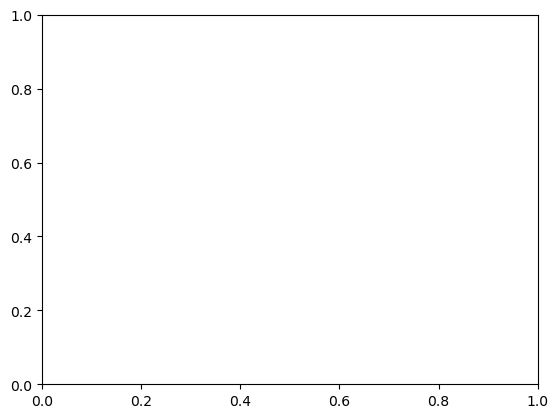

In [155]:
fig, ax = plt.subplots()
plt.plot(num_trials, list_val_freq * 100, color='#6e7aaa')
plt.xlabel('Number of trials', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yticks(fontsize=14)
plt.title('Frequency of obtaining a value by number of trials')
plt.show()